###### task 1

In [2]:
import pandas as pd
data=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
data

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [3]:
import numpy as np
from scipy import stat

# Calculate mean, median, and mode for each subject
mean_scores = np.mean(data, axis=0)
median_scores = np.median(data, axis=0)
mode_scores = stats.mode(data, axis=0).mode[0]

# Display the results
subjects = ['Statistics', 'Python', 'Tableau']

for i, subject in enumerate(subjects):
    print(f"{subject} - Mean: {mean_scores[i]}, Median: {median_scores[i]}, Mode: {mode_scores[i]}")

ImportError: cannot import name 'stat' from 'scipy' (C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\__init__.py)

import pandas as pd
import statistics as st

#Reading data from existing .csv file using read_csv() of pandas module and store into a dataframe
data=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
print(data)

In [4]:
import pandas as pd
# Create DataFrame
df = pd.DataFrame(data)

# Calculate mean, median, and mode for each subject
mean_scores = df.mean()
median_scores = df.median()
mode_scores = df.mode().iloc[0]# iloc[0]:This part extracts the first row of the resulting DataFrame. 

# Create a new DataFrame for the results
results_df = pd.DataFrame({
    'Mean': mean_scores,
    'Median': median_scores,
    'Mode': mode_scores
})

# Transpose the DataFrame for better readability
results_df = results_df.T

# Display the results DataFrame
print(results_df)

        Statistics  Python  Tableau
Mean         60.89   81.84    68.02
Median       60.00   82.00    69.00
Mode         55.00   86.00    65.00



###### task 2

In [15]:
# Calculate variance, coefficient of variation, and mean for each subject
variance_scores = df.var()
coefficient_of_variation_scores = df.std() / df.mean()
mean_scores = df.mean()

# Create a new DataFrame for the results
results_df = pd.DataFrame({
    'Variance': variance_scores,
    'Coefficient of Variation': coefficient_of_variation_scores,
    'Mean': mean_scores
})

# Display the results DataFrame
print(results_df)

             Variance  Coefficient of Variation       Mean
Statistics  56.696374                  0.123620  60.910112
Python      18.815628                  0.053176  81.573034
Tableau     55.768131                  0.109712  68.067416


##### task 3

In [17]:
import pandas as pd
from scipy.stats import skew

# Calculate skewness for each subject
skewness_scores = df.apply(skew)

# Identify the subject with the most skew
most_skewed_subject = skewness_scores.idxmax()

# Display the skewness scores
print("Skewness Scores:")
print(skewness_scores)

# Display the most skewed subject
print("\nThe most skewed subject is:", most_skewed_subject)

Skewness Scores:
Statistics    0.197544
Python        0.200203
Tableau      -1.084409
dtype: float64

The most skewed subject is: Python


###### task 4

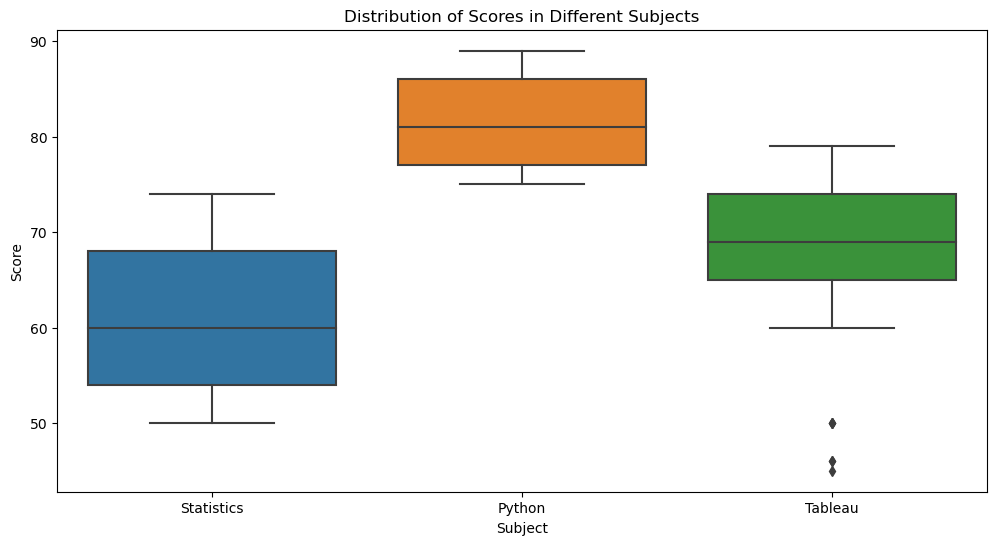

Skewness Scores:
Statistics    0.197544
Python        0.200203
Tableau      -1.084409
dtype: float64

The most skewed subject is: Python


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
# Visualize distribution using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Distribution of Scores in Different Subjects')
plt.ylabel('Score')
plt.xlabel('Subject')
plt.show()

# Calculate skewness for each subject
skewness_scores = df.apply(skew)

# Identify the subject with the most skew
most_skewed_subject = skewness_scores.idxmax()

# Display skewness scores
print("Skewness Scores:")
print(skewness_scores)

# Display the most skewed subject
print("\nThe most skewed subject is:", most_skewed_subject)

##### task 5|

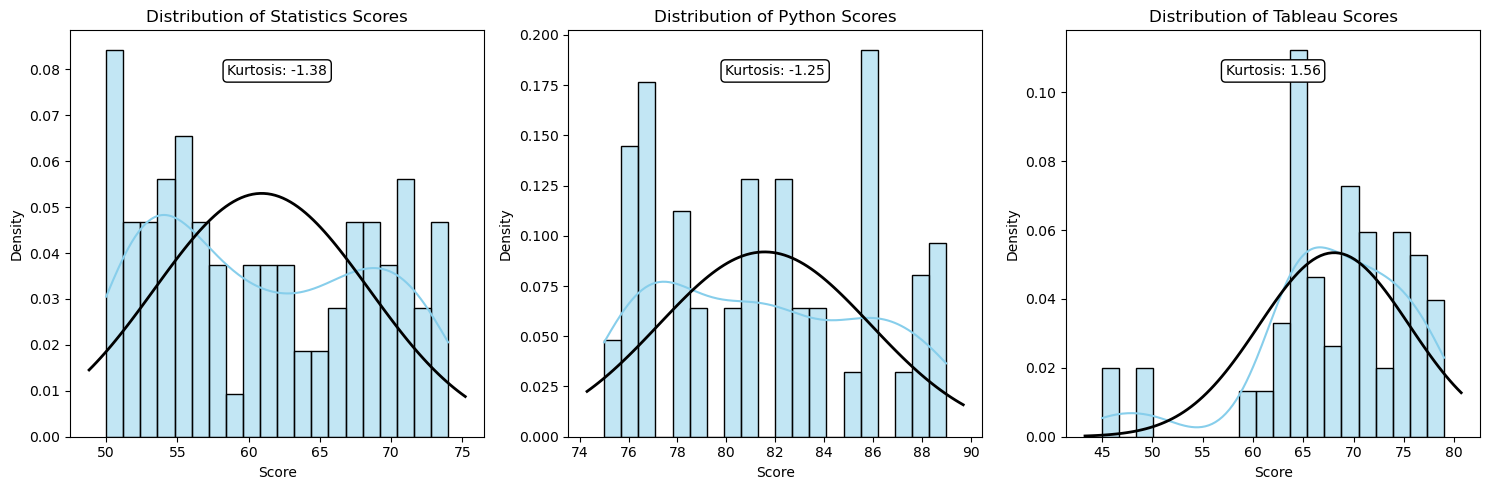

In [21]:
# Plot normal distribution curves and calculate kurtosis for each subject
plt.figure(figsize=(15, 5))

for i, subject in enumerate(df.columns, start=1):
    plt.subplot(1, 3, i)
    
    # Plot histogram
    sns.histplot(df[subject], kde=True, color='skyblue', stat='density', bins=20)
    
    # Plot normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[subject].mean(), df[subject].std())
    plt.plot(x, p, 'k', linewidth=2)
    
    # Calculate and display kurtosis
    kurt = kurtosis(df[subject])
    plt.text(0.5, 0.9, f'Kurtosis: {kurt:.2f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')

plt.tight_layout()
plt.show()